# Data Preparation , Handling Data , Filling Missing Values ....

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from numpy import nan as NA 

### 1. Handling  Missing Data 

*In pandas, we’ve adopted a convention used in the R programming language by refer
ring to missing data as NA, which stands for not available. In statistics applications, 
NA data may either be data that does not exist or that exists but was not (through problems with data collection, for example). When cleaning up data for analysis, it is often important to do analysis on the missing data itself to identify data collection problems or potential biases in the data caused by missing data.*

In [2]:
# In case of Missing Values they are represented as follows : -
print("The data type of NaN value if : ",type(np.nan))  # It represents the Not a Number value with Floating point 
print("The Data Type of None is : ",type(None))

# The Above Mentioned both types can be easily detected 

The data type of NaN value if :  <class 'float'>
The Data Type of None is :  <class 'NoneType'>


In [3]:
sample_data=pd.Series(['Hitler','Mussolini',np.nan,'Stalin','Chin',np.nan])

# Detecting the Null Values using --> obj.isnull() / obj.isna()
sample_data.isna()

0    False
1    False
2     True
3    False
4    False
5     True
dtype: bool

In [4]:
# Notice that `None` is also considered as a Null Values 
sample_data
sample_data[6]='None'
print(sample_data)

print("\n",sample_data.isna())

0       Hitler
1    Mussolini
2          NaN
3       Stalin
4         Chin
5          NaN
6         None
dtype: object

 0    False
1    False
2     True
3    False
4    False
5     True
6    False
dtype: bool


*Some of the useful methods which can easily and conviniently handle the missing data or fill them are `dropna()` , `fillna()` , `isnull()` , `notnull()`*


![Screenshot 2024-08-27 093136.png](<attachment:Screenshot 2024-08-27 093136.png>)
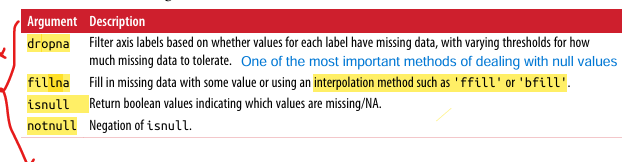

#### Filtering out Missing Data

In [5]:
num_data=pd.Series([1,234,5,4,np.nan,24,np.nan,np.nan])
num_data

0      1.0
1    234.0
2      5.0
3      4.0
4      NaN
5     24.0
6      NaN
7      NaN
dtype: float64

In [6]:
# Drops/Filters out  all the null values if conditions are not defined :-
print(num_data.dropna(),"\n")
# The Same can be filtered out using : -
print(num_data[num_data.notna()])

0      1.0
1    234.0
2      5.0
3      4.0
5     24.0
dtype: float64 

0      1.0
1    234.0
2      5.0
3      4.0
5     24.0
dtype: float64


*It is important to note that when using `dropna()` if inplace is not set to true then it only returns a copy of the data object without making any changes in the original data*

In [7]:
# Creating a Dataframe where selective use of dropna() can be done
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],[NA, NA, NA], [NA, 6.5, 3.]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


*Passing `how='all'` will only drop `rows` that are all NA* \
*Passing `how='any'` which is used by default drops all the null values*

In [8]:
# Drop all the rows containing even single null values default(axis=0)
data.dropna(how='any')

,0,1,2
0,1.0,6.5,3.0


In [9]:
# Drop all the rows containing all the null values  default(axis=0)
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


*Note that by default any condition passed through `how` for `dropna` is applicable along `rows` that is the default `axis=0` for all to specifiy operations along columns use `axis=1`  

In [10]:
data[3]=NA
# Adds a null column named '3' to the data frame 

In [11]:
data

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [12]:
data.dropna(how='all',axis=1)

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


**Setting a Threshold Values to Filter out the Data** \
*A related way to filter out DataFrame rows tends to concern time series data. Suppose you want to `keep only rows containing a certain number of observations`. You can indicate this with the `thresh=val` argument* 


**The thresh attribute in Pandas' dropna() function specifies the minimum number of non-NaN values required in a row or column to keep it. It does not drop values that are exactly equal to the specified threshold value.** 

Here's a breakdown of how it works:

1. If a row or column has fewer than thresh non-NaN values, it will be dropped.
2. If a row or column has exactly thresh non-NaN values, it will be kept.
3. If a row or column has more than thresh non-NaN values, it will be kept

In [13]:
# Generating Random data set
sdata=pd.DataFrame(np.random.randn(8,6))
sdata

,0,1,2,3,4,5
0,0.449323,-0.593295,0.178585,-0.415799,2.070554,-1.420577
1,1.112976,1.055048,0.683844,-0.236763,0.578298,0.055686
2,1.322653,-0.438055,-0.520275,-1.765954,1.177542,0.763846
3,0.932710,-0.666826,-0.615249,-0.812264,-0.564947,0.961162
4,0.364879,0.478111,1.749744,-0.236747,-0.404755,0.253051
5,-0.340073,-0.124475,-1.018173,0.981862,0.454941,-1.344939
6,-0.300379,-2.833094,-0.999499,-0.028668,0.617809,2.440686
7,-0.451497,-1.486060,1.048520,-0.060679,-0.592700,2.637348


In [14]:
# Assinging random null values to dataset/df
sdata.iloc[2:6,[0,5]]=NA
sdata.iloc[:3,2]=NA
sdata.iloc[[2,5,3],1]=NA
sdata

,0,1,2,3,4,5
0,0.449323,-0.593295,NaN,-0.415799,2.070554,-1.420577
1,1.112976,1.055048,NaN,-0.236763,0.578298,0.055686
2,NaN,NaN,NaN,-1.765954,1.177542,NaN
3,NaN,NaN,-0.615249,-0.812264,-0.564947,NaN
4,NaN,0.478111,1.749744,-0.236747,-0.404755,NaN
5,NaN,NaN,-1.018173,0.981862,0.454941,NaN
6,-0.300379,-2.833094,-0.999499,-0.028668,0.617809,2.440686
7,-0.451497,-1.486060,1.048520,-0.060679,-0.592700,2.637348


In [15]:
# default(axis=0)
sdata.dropna(thresh=5)
# There should be minimum of 5 non-NaN Values to keep this row all other rows can be dropped 

,0,1,2,3,4,5
0,0.449323,-0.593295,NaN,-0.415799,2.070554,-1.420577
1,1.112976,1.055048,NaN,-0.236763,0.578298,0.055686
6,-0.300379,-2.833094,-0.999499,-0.028668,0.617809,2.440686
7,-0.451497,-1.486060,1.048520,-0.060679,-0.592700,2.637348


 *Concept of `thresh` hold becomes important as it let us spceifies the number min of `non-NaN`/`~Nan` values required to keep the columns/rows as in real life scenarios we can look at data and decide for a row ro column corresponding to an attribute whether if significant amount of NaN are present it can't be dropped as it may lead to loss of other important factors along that row or column* \
**Here we are concerned about the values which are `actual values` / `non-Nan values`**

In [16]:
# The Concept of Threshold can be  down a column too.....
sdata.dropna(thresh=6,axis=1)

,3,4
0,-0.415799,2.070554
1,-0.236763,0.578298
2,-1.765954,1.177542
3,-0.812264,-0.564947
4,-0.236747,-0.404755
5,0.981862,0.454941
6,-0.028668,0.617809
7,-0.060679,-0.592700


#### Filling in Missing Values

1. Filling of Missing Values is Done using the `fillna` method generally 
2. Missing Values can be filled using different methods `mean` , `interpolation` using `ffill` Forward Fill Values or `bfill` backward fill values
3. Filtering out  Msiing Values is a Apprach where we remove all the NaN r specific Null Values which can be one method to handle NaN Values 
4. Another approch is to fill the NaN values with ceratin relevant parameters 

In [17]:
sdata

,0,1,2,3,4,5
0,0.449323,-0.593295,NaN,-0.415799,2.070554,-1.420577
1,1.112976,1.055048,NaN,-0.236763,0.578298,0.055686
2,NaN,NaN,NaN,-1.765954,1.177542,NaN
3,NaN,NaN,-0.615249,-0.812264,-0.564947,NaN
4,NaN,0.478111,1.749744,-0.236747,-0.404755,NaN
5,NaN,NaN,-1.018173,0.981862,0.454941,NaN
6,-0.300379,-2.833094,-0.999499,-0.028668,0.617809,2.440686
7,-0.451497,-1.486060,1.048520,-0.060679,-0.592700,2.637348


In [18]:
# All NaN with 0
sdata.fillna(0)
# It just returns another obejct that is the copy of the data 
# Inorder to make this changes permanent we have to overide the exiting df 
#  using 'inplace=True' 

,0,1,2,3,4,5
0,0.449323,-0.593295,0.000000,-0.415799,2.070554,-1.420577
1,1.112976,1.055048,0.000000,-0.236763,0.578298,0.055686
2,0.000000,0.000000,0.000000,-1.765954,1.177542,0.000000
3,0.000000,0.000000,-0.615249,-0.812264,-0.564947,0.000000
4,0.000000,0.478111,1.749744,-0.236747,-0.404755,0.000000
5,0.000000,0.000000,-1.018173,0.981862,0.454941,0.000000
6,-0.300379,-2.833094,-0.999499,-0.028668,0.617809,2.440686
7,-0.451497,-1.486060,1.048520,-0.060679,-0.592700,2.637348


*Dict can be passed to fillna w.r.t specific columns*

In [19]:
sdata.fillna({0:0.00,1:1.11,2:2.22,3:3.3,4:4.44,5:5.55})

,0,1,2,3,4,5
0,0.449323,-0.593295,2.220000,-0.415799,2.070554,-1.420577
1,1.112976,1.055048,2.220000,-0.236763,0.578298,0.055686
2,0.000000,1.110000,2.220000,-1.765954,1.177542,5.550000
3,0.000000,1.110000,-0.615249,-0.812264,-0.564947,5.550000
4,0.000000,0.478111,1.749744,-0.236747,-0.404755,5.550000
5,0.000000,1.110000,-1.018173,0.981862,0.454941,5.550000
6,-0.300379,-2.833094,-0.999499,-0.028668,0.617809,2.440686
7,-0.451497,-1.486060,1.048520,-0.060679,-0.592700,2.637348


**The idea of passing a Dictionary to fillna() is important as Different columns generally represent different attributes , so filling each w.r.t their attribute significance is important**

In [20]:
# Filling each columns with avg of each 
sdata.fillna({0:sdata.iloc[:,0].mean(),1:sdata.iloc[:,1].mean(),2:sdata.iloc[:,2].mean(),3:sdata.iloc[:,3].mean(),4:sdata.iloc[:,4].mean(),5:sdata.iloc[:,5].mean()})

,0,1,2,3,4,5
0,0.449323,-0.593295,0.033069,-0.415799,2.070554,-1.420577
1,1.112976,1.055048,0.033069,-0.236763,0.578298,0.055686
2,0.202606,-0.675858,0.033069,-1.765954,1.177542,0.928286
3,0.202606,-0.675858,-0.615249,-0.812264,-0.564947,0.928286
4,0.202606,0.478111,1.749744,-0.236747,-0.404755,0.928286
5,0.202606,-0.675858,-1.018173,0.981862,0.454941,0.928286
6,-0.300379,-2.833094,-0.999499,-0.028668,0.617809,2.440686
7,-0.451497,-1.486060,1.048520,-0.060679,-0.592700,2.637348


`method` & `limit` Attribute 
* limit int, default None
If method is specified, this is the maximum number of consecutive NaN values to forward/backward fill. In other words, if there is a gap with more than this number of consecutive NaNs, it will only be partially filled. If method is not specified, this is the maximum number of entries along the entire axis where NaNs will be filled. Must be greater than 0 if not None. 

In [21]:
sdata.fillna(method='bfill',limit=2)

C:\Users\Sian\AppData\Local\Temp\ipykernel_3524\4113941561.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sdata.fillna(method='bfill',limit=2)


,0,1,2,3,4,5
0,0.449323,-0.593295,NaN,-0.415799,2.070554,-1.420577
1,1.112976,1.055048,-0.615249,-0.236763,0.578298,0.055686
2,NaN,0.478111,-0.615249,-1.765954,1.177542,NaN
3,NaN,0.478111,-0.615249,-0.812264,-0.564947,NaN
4,-0.300379,0.478111,1.749744,-0.236747,-0.404755,2.440686
5,-0.300379,-2.833094,-1.018173,0.981862,0.454941,2.440686
6,-0.300379,-2.833094,-0.999499,-0.028668,0.617809,2.440686
7,-0.451497,-1.486060,1.048520,-0.060679,-0.592700,2.637348


**Note that `method=` is deprecated as of now instead use `obj.ffill()` or `obj.bfill`**

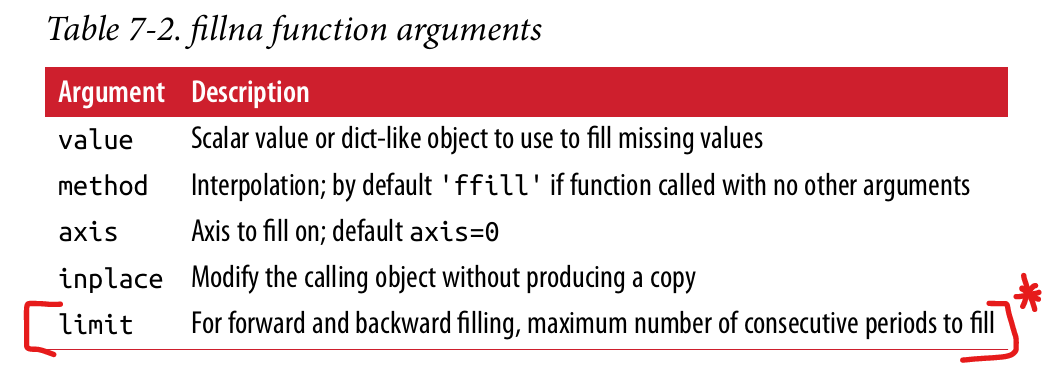

### 2] Data Transformation

**Analysing the Duplicated Rows**
*  Duplicate rows may be found in a DataFrame for any number of reasons. 


`df.duplicated` retruns a boolean series which compares all the columns across a row and find duplicate rows in the dataframe . If we want we can pass series or list of columns which has to be compared across rows in order to assign them as duplicate

In [23]:
dup_data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],'k2': [1, 1, 2, 3, 3, 4, 4]})
dup_data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [25]:
dup_data['k3']=range(7)
dup_data

,k1,k2,k3
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [28]:
dup_data.duplicated()
# Across all the columns none is duplicate

0    False
1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool

In [29]:
# When we consider only k1 and k2 column
dup_data.duplicated(['k1','k2'])

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

*`df.drop_duplicates()` can be used with various other list of columns to be considered for evaluating duplication  or `keep=last` in order to retaing the last duplicate instead of first which is the by-default parameter*

In [32]:
dup_data.drop_duplicates(['k1','k2'])
# By-default drops the last row and keeps the first occuring rows -->
# [Later occurence if the duplicate of the first occurence ] (keep='first')
# [first occurence is the duplicate of the Later occurence ] (keep='last')

,k1,k2,k3
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5


In [33]:
dup_data.drop_duplicates(['k1','k2'],keep='last')

,k1,k2,k3
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


#### Transforming a Data using Functions(Lambdas ,etc ) or Mapping (map()) in Python \
For many datasets, you may wish to perform some transformation based on the val
ues in an array, Series, or column in a DataFrame. 

#### `Copy_On_Write` issues in Pandas

*C:\Users\Sian\AppData\Local\Temp\ipykernel_26252\4031387155.py:1: ChainedAssignmentError: A value is trying to be set on a copy of a DataFrame or Series through chained assignment.
When using the Copy-on-Write mode, such chained assignment never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy.

Try using '.loc[row_indexer, col_indexer] = value' instead, to perform the assignment in a single step.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wash_df[wash_df['Make']=='TESLA']['Clean Alternative Fuel Vehicle (CAFV) Eligibility']='Clean EV'*